In [109]:
# Might require to install yfinance and mplfinance and keras (!pip install ...)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import yfinance as yf
#import mplfinance as mpf
from datetime import datetime

The purpose of this analysis is to get an overall sense of tech stock trends. Later we will apply machine learning to try and predict market trends. For the machine learning part, we use Keras. Keras is a high-level neural networks API, written in Python. It's designed to make building deep learning models straightforward and user-friendly, allowing us to focus on creating models rather than thinking about the underlying maths.



# 1. Importing Up to Date Stock Data Using yfinance

I chose to look at the four most well known companies in the tech sector. The start date and end date select a 1 year period.

The data will include columns that represents the ups and downs of the stock price: opening price, closing price, highs, lows and adjusted closing price (a measure more representative of the actual closing price) and the volume of stocks traded.

In [110]:
# List of tech stocks for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set the start and end times for data retrieval
end = datetime.now()
start = datetime(end.year - 1, end.month-1, end.day)

# Download the data for each stock
company_dfs = []

for stock, name in zip(tech_list, company_names):
    df = yf.download(stock, start=start, end=end)
    df['company_name'] = name
    company_dfs.append(df)

# Concatenate all DataFrames
df_all = pd.concat(company_dfs, axis=0)

# Display the last 10 rows of the concatenated DataFrame
print(df_all.head(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-07  182.130005  183.130005  177.350006  178.850006  177.699524   
2023-08-08  179.690002  180.270004  177.580002  179.800003  178.643402   
2023-08-09  180.869995  180.929993  177.009995  178.190002  177.043762   
2023-08-10  179.479996  180.750000  177.600006  177.970001  176.825165   
2023-08-11  177.320007  178.619995  176.550003  177.789993  176.884857   
2023-08-14  177.970001  179.690002  177.309998  179.460007  178.546356   
2023-08-15  178.880005  179.479996  177.050003  177.449997  176.546600   
2023-08-16  177.130005  178.539993  176.500000  176.570007  175.671082   
2023-08-17  177.139999  177.509995  173.479996  174.000000  173.114151   
2023-08-18  172.300003  175.100006  171.960007  174.490005  173.601685   

              Volume company_name  
Date                               
2023-08-07  97576100        APPLE  
202

We can observe the data is indexed by date.

In [111]:
df_all.shape

(1096, 7)

In [112]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2023-08-07 to 2024-09-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1096 non-null   float64
 1   High          1096 non-null   float64
 2   Low           1096 non-null   float64
 3   Close         1096 non-null   float64
 4   Adj Close     1096 non-null   float64
 5   Volume        1096 non-null   int64  
 6   company_name  1096 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 68.5+ KB


No null values found in the data. Data is mostly composed of float values representing the prices.

In [113]:
df_all.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03
mean,223.600917,225.600542,221.533960,223.650507,223.072097,3.678456e+07
std,100.793750,101.391402,99.953623,100.726528,100.189440,2.274003e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,6.883069e+06
25%,153.700001,155.179996,152.761005,153.827496,153.783752,1.926878e+07
50%,179.965004,181.525002,178.004997,179.639999,179.364998,3.108820e+07
75%,255.107494,256.497494,252.180000,254.150009,253.365021,4.850615e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,2.464214e+08


In [114]:
df = df_all
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-07,182.130005,183.130005,177.350006,178.850006,177.699524,97576100,APPLE
2023-08-08,179.690002,180.270004,177.580002,179.800003,178.643402,67823000,APPLE
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.043762,60378500,APPLE
2023-08-10,179.479996,180.750000,177.600006,177.970001,176.825165,54686900,APPLE
2023-08-11,177.320007,178.619995,176.550003,177.789993,176.884857,51988100,APPLE


The data imported from Yahoo Finance is extremely reliable. A quick overview of the data and a double check of prices proves the validity of the data. 

# 2. Visualising the Data

# 2.1 Time Series Chart of the Adjusted Closing Price 

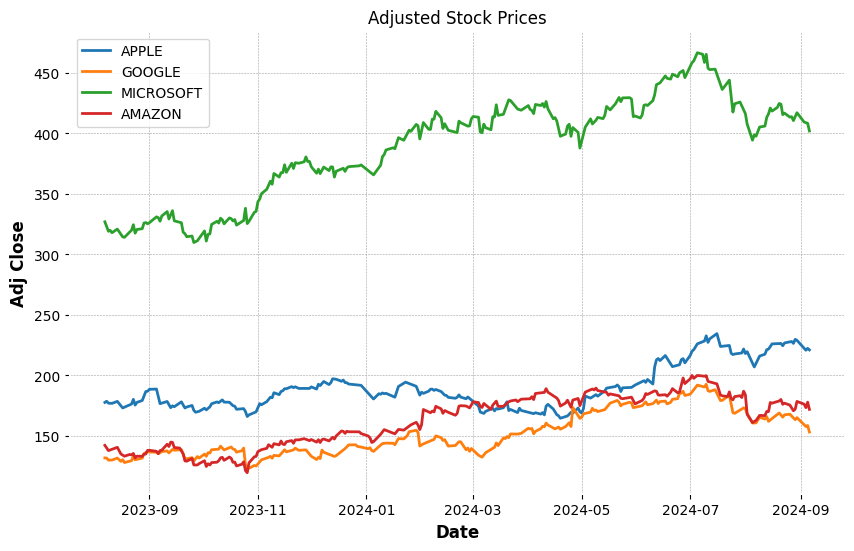

In [115]:
plt.figure(figsize=(10, 6))

# Loop through each unique company name and plot the adjusted close price
for company_name in df['company_name'].unique():
    stock_data = df[df['company_name'] == company_name]
    plt.plot(stock_data.index, stock_data['Adj Close'], label=company_name)

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Adjusted Stock Prices')
plt.legend()
plt.show()

# 2.2 Chart Representing the Highs and Lows of the Stock Market in a 4 Month Period

Looking at these charts we can see a downward trend between June and July, followed by a period of recovery. Apple was the least affected
Articles from Investopedia suggest it is a mix of investor rotation, interest rate speculation about potential interest rate cuts making stocks less attractive, and earning disappointement from underwhelming earning reports.

In [116]:
# the index needed to be sorted for candle stick chart
df = df.sort_index()

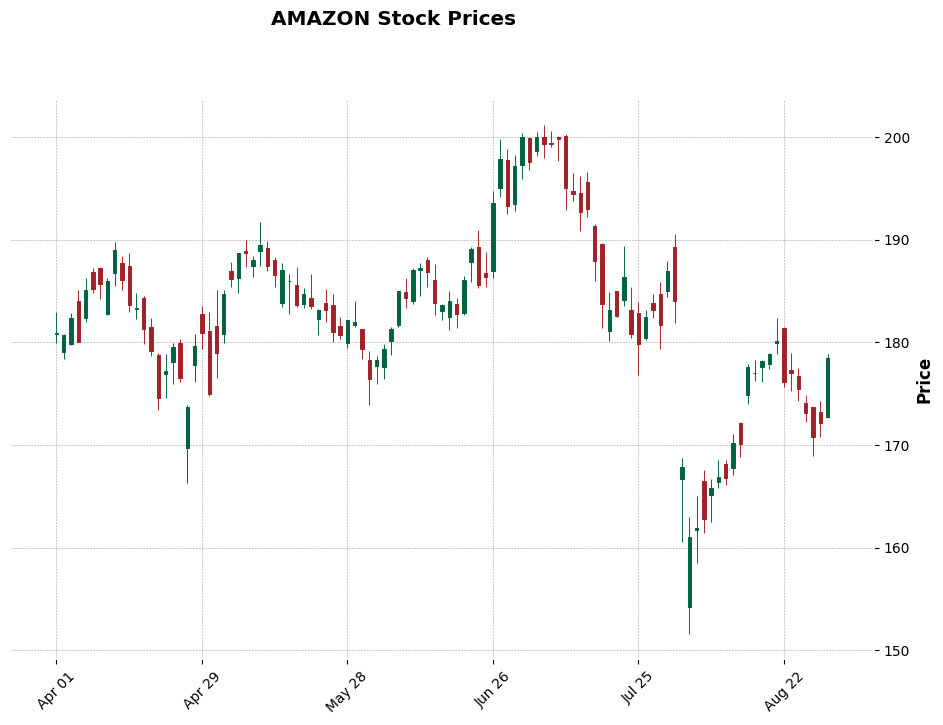

<Figure size 640x480 with 0 Axes>

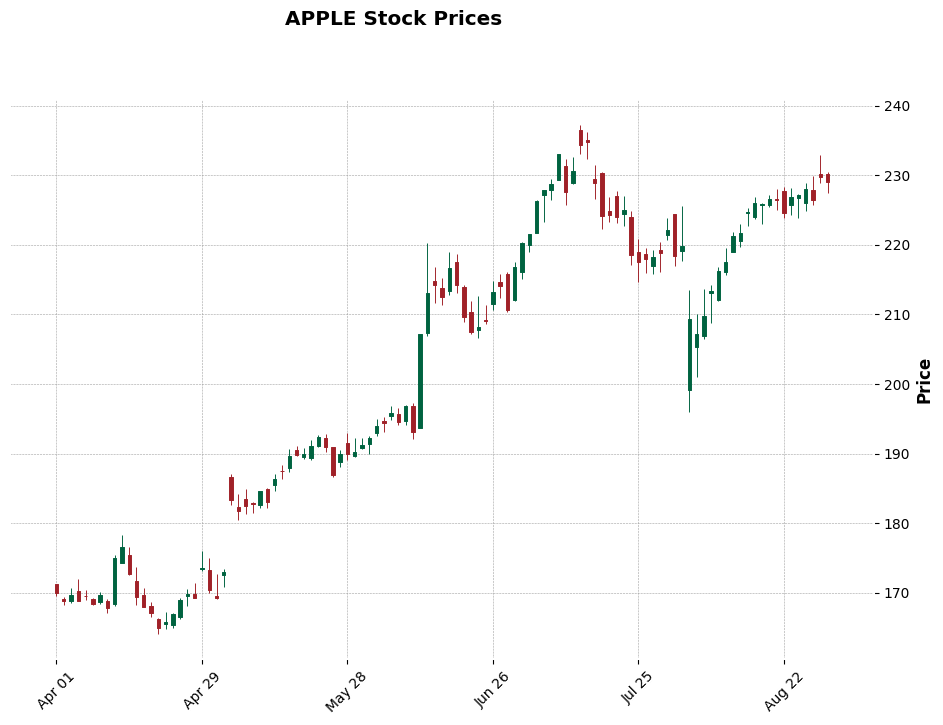

<Figure size 640x480 with 0 Axes>

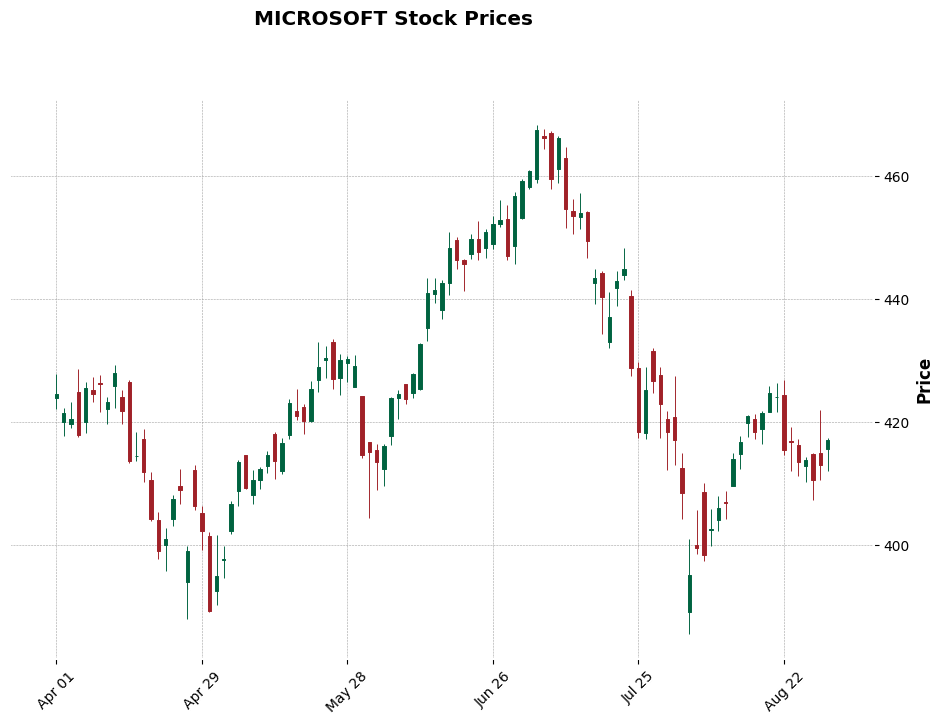

<Figure size 640x480 with 0 Axes>

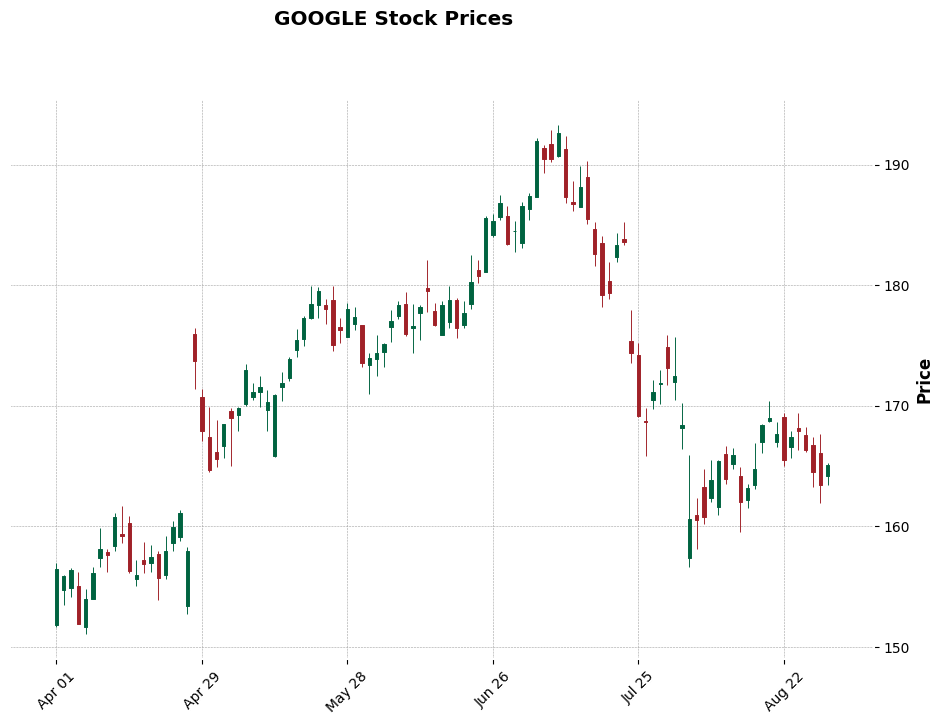

<Figure size 640x480 with 0 Axes>

In [117]:
start_date = '2024-04-01'
end_date = '2024-08-31'

# Filter the DataFrame by date range
filtered_df = df.loc[start_date:end_date]

for company_name in filtered_df['company_name'].unique():
    stock_data = filtered_df[filtered_df['company_name'] == company_name]
     
    # Select the necessary columns for the candlestick chart
    stock_data_candlestick = stock_data[['Open', 'High', 'Low', 'Close']]
    
    # Plot candlestick chart
    #mpf.plot(stock_data_candlestick, type='candle', style='charles',
             #title=f'{company_name} Stock Prices',
             #ylabel='Price',
             #figsize=(12, 8))
    #plt.savefig(f'/kaggle/working/{company_name}_price.png')

# 2.3 Moving Average Charts Based on Periods of 10, 20 and 30 days.

While there was a decrease in price between June and July, the moving average price Increased. This suggest that despite the decrease in June, prices are still higher on average than past prices. 

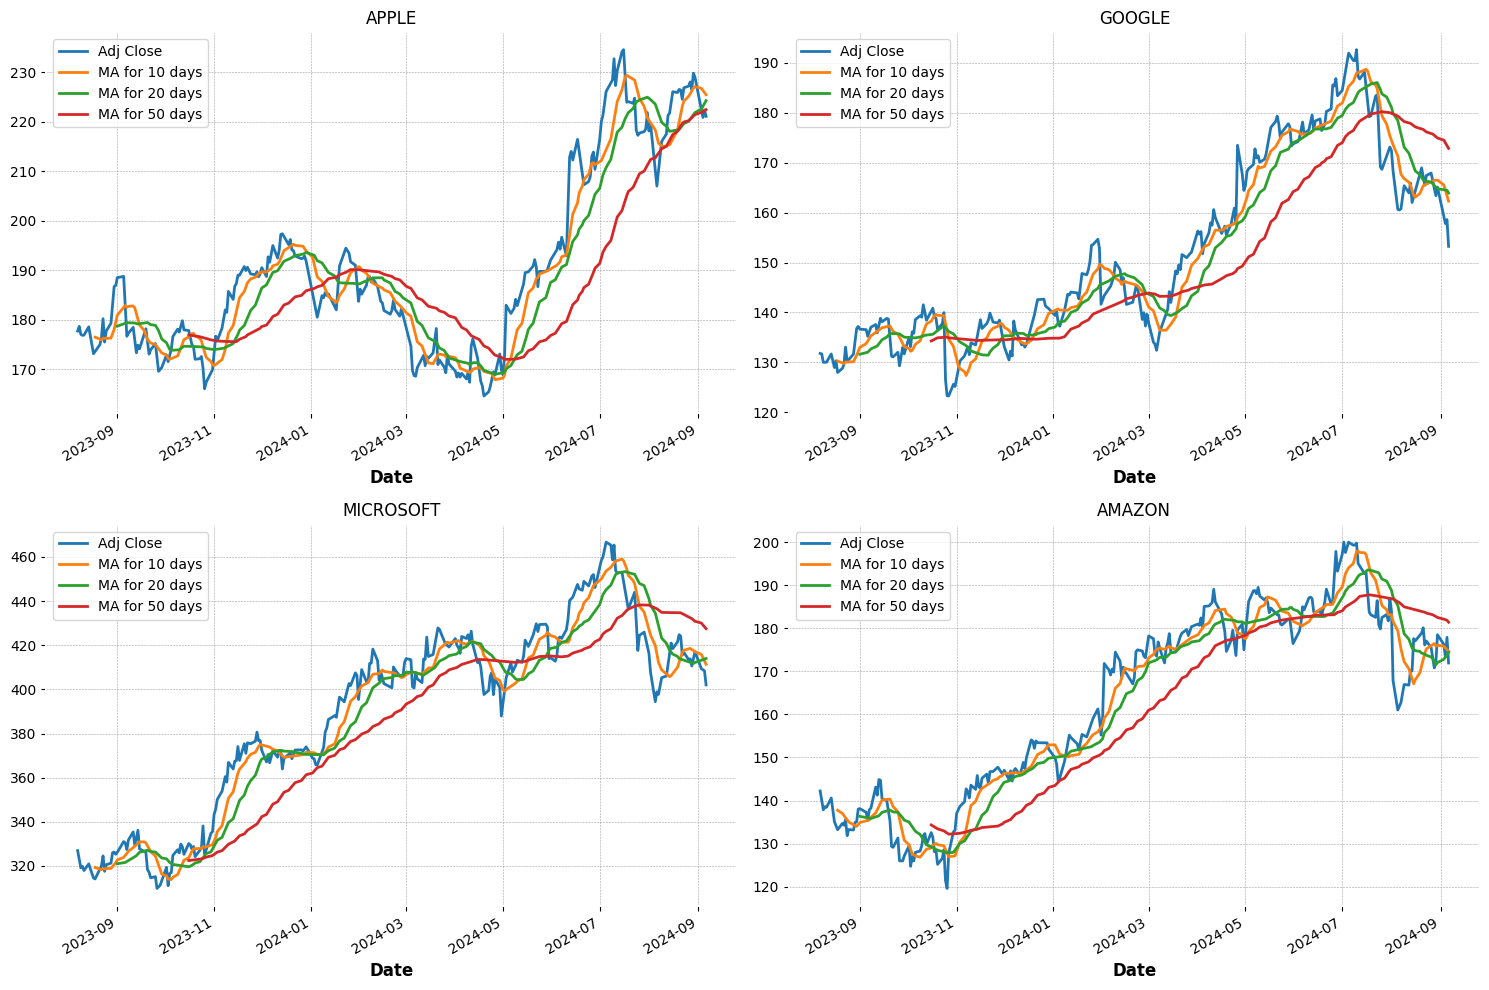

In [118]:
ma_day = [10, 20, 50]

# Calculated the moving averages for each company
for company in company_names:
    company_df = df[df["company_name"] == company]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        df.loc[df["company_name"] == company, column_name] = company_df['Adj Close'].rolling(ma).mean()
        
# Also added a column for daily returns which is the percentage change in price for future visualisation
df['Daily Return'] = df.groupby('company_name')['Adj Close'].pct_change()

# Created seperate dataframes for each company
AAPL = df[df["company_name"] == "APPLE"]
GOOG = df[df["company_name"] == "GOOGLE"]
MSFT = df[df["company_name"] == "MICROSOFT"]
AMZN = df[df["company_name"] == "AMAZON"]

# Arrange the plots to display 4 charts side by side
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

#APPLE
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

#GOOGLE
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

#MICROSOFT
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

#AMAZON
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

# Show the plots
plt.tight_layout()
plt.show()

# 2.4 Charts Representing Daily Returns from Stocks

The daily returns show the volatility of stocks in the market. You can quickly see that the percentage daily returns moves around the 0% mark. Amazon and Google have a slightly wider variation range, but changes generally don't go past the 0.1% mark.

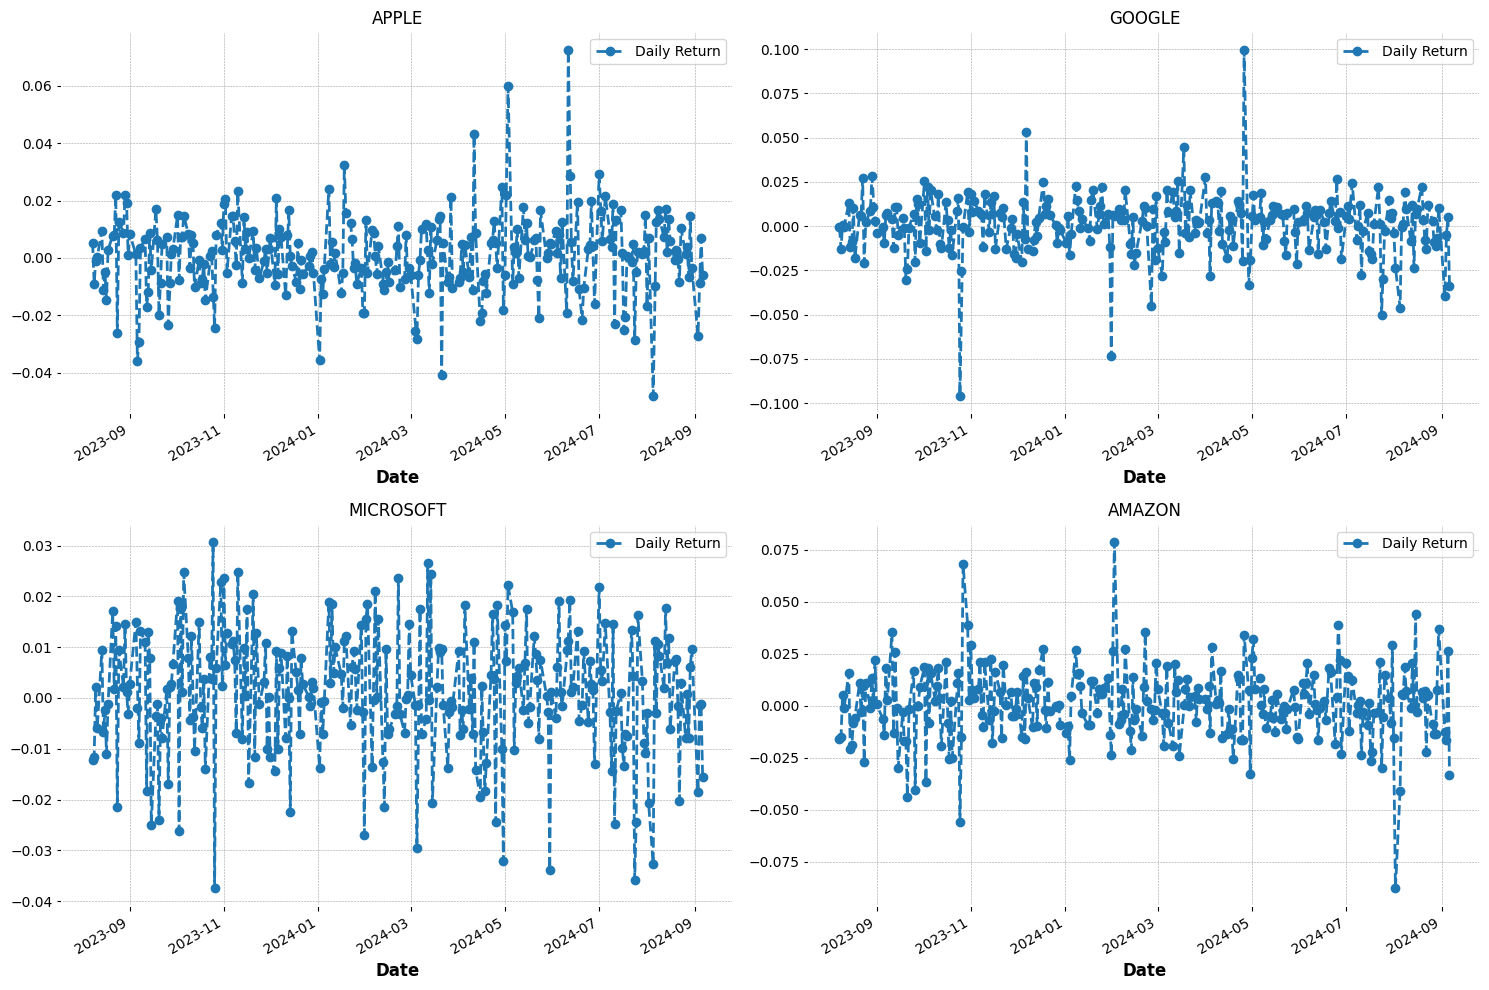

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 2.5 Daily Return Distribution Charts

The Daily Returns tend to centre around a mean of zero, showing characteristics of a nomral distribution. Google and Amazon have a wider range in percentage changes,but the extreme values are rare.

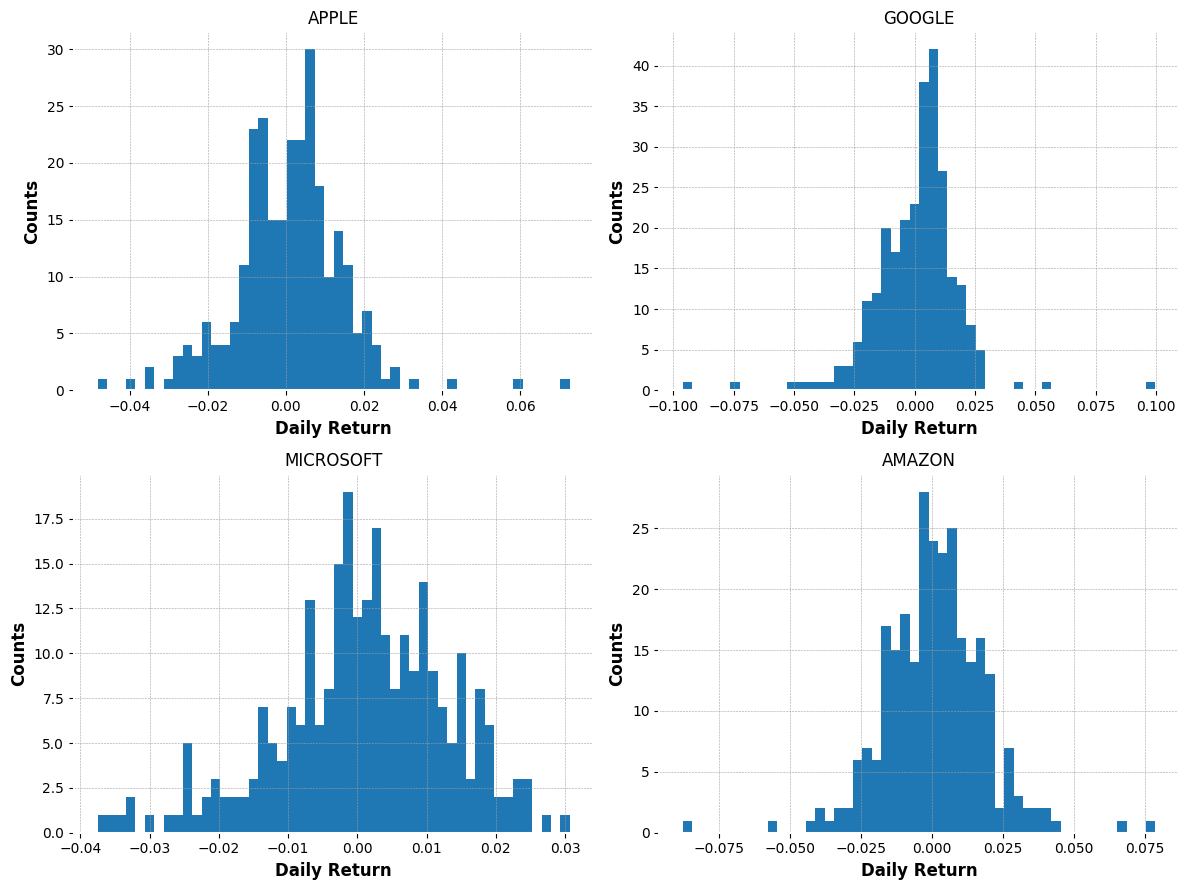

In [120]:
plt.figure(figsize=(12, 9))

# Loop through the list of companies
for i, company_name in enumerate(company_names, 1):
    plt.subplot(2, 2, i)
    company_data = df[df["company_name"] == company_name]
    company_data['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name}')
    
plt.tight_layout()
plt.show()

# 2.6 Stock Correlation Between the Four Big Tech Companies

There are are positive correlations between each stock suggesting stock performance is affected by common factors as stock market speculation, and investor sentiment. Amazon and Google stock have a strong correlation between stocks performance.

In [121]:
# Created a df of Adjusted Closing Prices for Heat Map Analysis of stock correlations
# The cell values represent the daily return or percentage change in closing prices
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-08-07 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-08-08 00:00:00+00:00,0.005312,-0.016031,-0.000758,-0.012299
2023-08-09 00:00:00+00:00,-0.008954,-0.014935,-0.012819,-0.011716
2023-08-10 00:00:00+00:00,-0.001235,0.005150,0.000461,0.002172
2023-08-11 00:00:00+00:00,0.000338,-0.001083,-0.000307,-0.005945


Text(0.5, 1.0, 'Correlation of stock closing price')

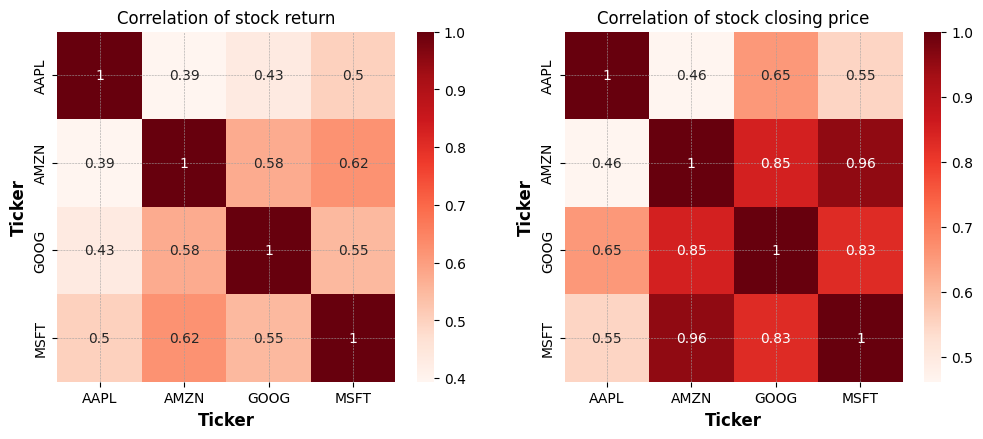

In [122]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='Reds')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Reds')
plt.title('Correlation of stock closing price')

# 2.7 Analysis of Risk and Expected Return

Overall each Tech stock is relatively low risk with low returns as they are well-established with a good reputation.
However when comparing the four we can see that Apple is the best stock to invest in as it is low risk with better expected returns.
Google on the otherhand is the the least attractive as in as it has higher risk and low expected returns.

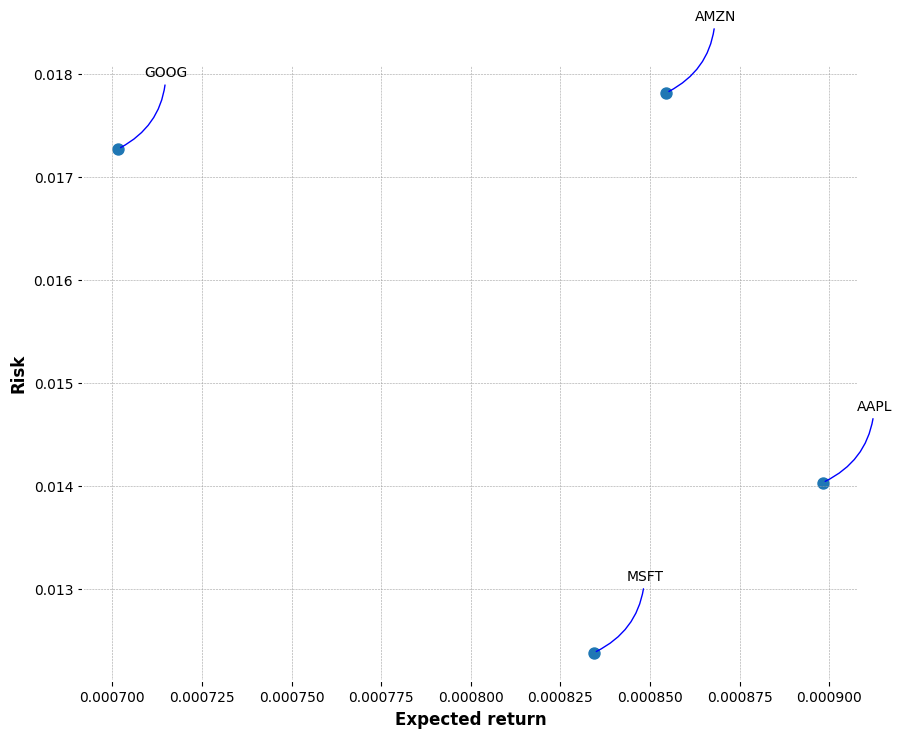

In [123]:
# Removes the previous NA values
rets = tech_rets.dropna()

#define the area of the dots.
area = np.pi * 20

# Create a scatter plot showing risk against expected return
plt.figure(figsize=(10, 8))
#the mean of the return values is the expected return, and the standard deviation is the measure of risk.
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#Labels the chart
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 3. Modelling Using Keras

# Keras implementation:
We use the LSTM (Long Short Term Memory) model, which is effective in predicted values based long term time-series data.
This model analyses multidimensional test data in sequences, gradually reducing the complexity until a single regression output is met.

# 3.1 Importing the Data

In [124]:
# created a larger dataframe for improved testing, I have chosen 10 years of sample data.
df2 = yf.download(stock, start= '2014-01-01', end=end)
data = df2.filter(['Close'])
# Converted the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on, we use 95% of data.
training_data_len = int(np.ceil( len(dataset) * .95 ))
#the ceil method in numpy rounds up the value to prevent loss of data due to rounding when spliting the data.
training_data_len

[*********************100%***********************]  1 of 1 completed


2554

# 3.2 Preprocessing

Standardising the data using MinMaxScaller

In [125]:
from sklearn.preprocessing import MinMaxScaler
#Standardise the data for improved performance
scaler = MinMaxScaler(feature_range=(0,1))
#holds the stansformed dataset
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02989995],
       [0.02948789],
       [0.0287311 ],
       ...,
       [0.85634452],
       [0.88090653],
       [0.84907284]])

# 3.3 Splitting the data

# Training Data Set Up

Mapping previous sequences of data with later data so that the model can learn from previous results.

In [126]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
# This is essentialy mapping previous data with later data points in the series, creating a sort of short-term memory for the model.
x_train = []
y_train = []

for i in range(60, len(train_data)):
# Create two sets of data, mapping previous data with later data using array indices
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to the required numpy format
x_train, y_train = np.array(x_train), np.array(y_train)

# The LSTM model requires the data to be in a specific shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02989995, 0.02948789, 0.0287311 , 0.02991611, 0.03096377,
       0.03071869, 0.02981646, 0.0280174 , 0.02978414, 0.02933438,
       0.02931553, 0.03034163, 0.03234538, 0.03166938, 0.03041166,
       0.02710709, 0.02675159, 0.02894656, 0.0261914 , 0.03125732,
       0.01932104, 0.01594377, 0.01642854, 0.01602456, 0.01821683,
       0.01996472, 0.01990817, 0.02015594, 0.01677866, 0.01891976,
       0.01896016, 0.01796367, 0.01627503, 0.01692678, 0.01610805,
       0.01746004, 0.0192214 , 0.01961999, 0.01970887, 0.02023942,
       0.01961461, 0.0207242 , 0.02300535, 0.02294879, 0.02292186,
       0.0225098 , 0.02204926, 0.02253942, 0.02277373, 0.02337432,
       0.02372444, 0.02472899, 0.02323697, 0.02208966, 0.01984083,
       0.0174789 , 0.01824915, 0.01520583, 0.01387539, 0.0138269 ])]
[0.01330981629310568]

[array([0.02989995, 0.02948789, 0.0287311 , 0.02991611, 0.03096377,
       0.03071869, 0.02981646, 0.0280174 , 0.02978414, 0.02933438,
       0.02931553, 0.03034163, 0.03

# Overview of the Process
* model = Sequential(): Initialise a sequential model, which is a linear stack of layers.
* LSTM(128): Adds an LSTM layer with 128 units. The number of units defines the dimensionality of the output space.
* return_sequences=True: This argument ensures that the LSTM layer returns the full sequence of outputs for each input sequence. This is important when stacking multiple LSTM layers, as the next LSTM layer expects a sequence as input.
* input_shape=(x_train.shape[1], 1): Specifies the shape of the input data. Here, x_train.shape[1] is the number of time steps (e.g., 60 in your earlier code), and 1 represents the number of features (since you are likely working with a univariate time series).

In [127]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
#Initialise a sequential model, which is a linear stack of layers
model = Sequential()
#Add two seperate layers
#The second layer only needs the output and not a sequence so return_sequence is set to false
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
#Adds a Dense (fully connected) layer with 25 neurons
#This layer helps the model learn more complex representations of the data after the LSTM layers
model.add(Dense(25))
#Adds a Dense layer with 1 neuron, which is the output layer
#This is a regression problem, so we need the final layer to produce a single output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Adam optimizer is often used for its efficiency in training deep networks

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2494/2494 ━━━━━━━━━━━━━━━━━━━━ 124s 49ms/step - loss: 0.0032


# Testing Data Set Up
Same process used in setting up the training data but the data we use for testing.

In [128]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# Since the data was scaled before training, you need to reverse the scaling to get the actual predicted values. 
# This step ensures that the predictions are in the same scale as the original data.
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
# RMSE is a common metric for regression tasks, measuring the average magnitude of the errors between predicted and actual values.
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


4.150324324106124

The model as a mean squared error of 4.44. Considering the compared values ranged between 160 and 200 over that period, we can be sastified with the error margin when looking at overall trends. However, this most model cannnot be used to predict the exact price and inform trade decisions as a difference of 4$ determine whether a trade is profitable or loss making.

# 3.4 Visualisation of Model Predictions

The first visulisation shows a wide view of the model predictions based on 10 years of data. We can see thatthe model did quite a good job at fitting the values with its predictions.

/tmp/ipykernel_36/3470036298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


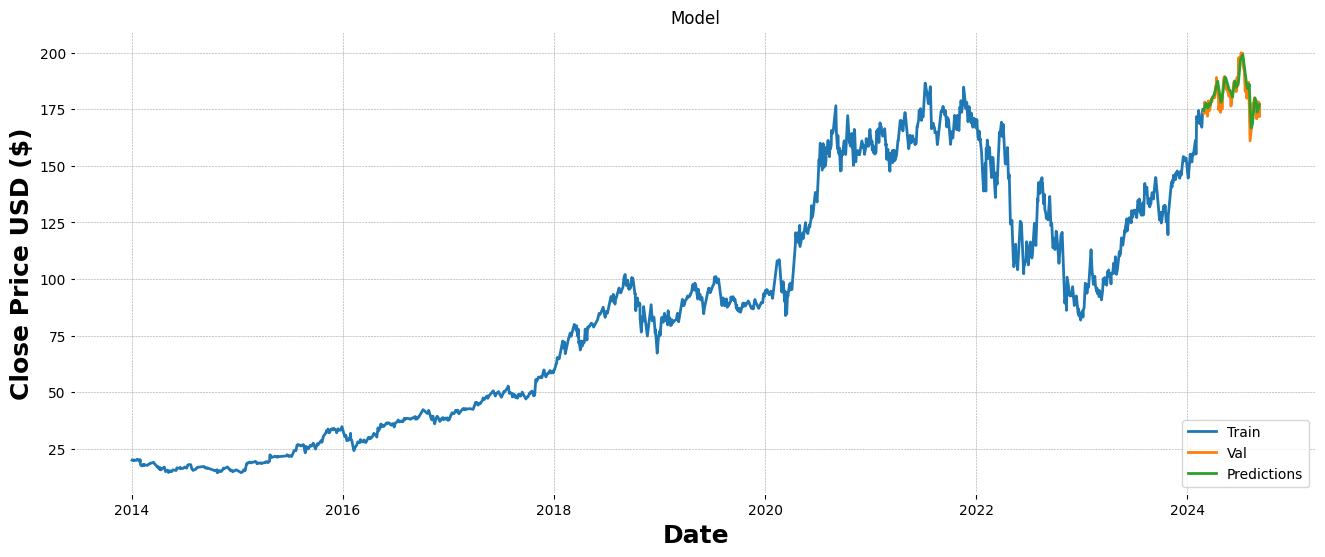

In [129]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Zooming in, we see that there is still a significant margin of error. This model can be used to gain an overall sense of market trends, but it should not be used to predict exact prices.

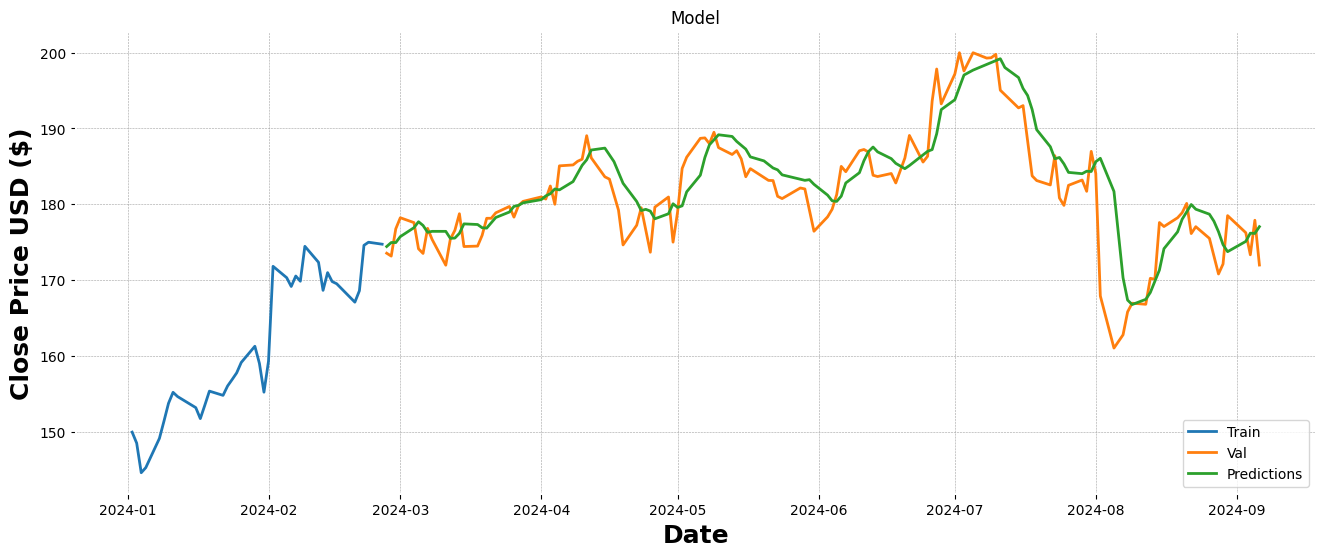

In [130]:
start_date = '2024-01-01'
end_date = '2024-12-31'

# Filter the DataFrame by date range to get a more zoomed in view.
filtered_train = train.loc[start_date:end_date]
filtered_valid = valid.loc[start_date:end_date]

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(filtered_train['Close'])
plt.plot(filtered_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# 4. Conclusion

From our analysis of some of the biggest tech companies, we found:
* June-July market downturn, suggested to be caused by investor rotation, market speculation, and disappointing earnings.
* However, Moving average prices have been increasing, suggesting a strong and steady tech sector.
* There are positive correlations between each stock because of the similar industry, they are affected by similar market ups and downs.
* Using LSTM modeling, we are able to accurately predict the overall trends of the markets.
* Further refining, would lead to more accurate price predictions.